In [9]:
from contrib.Ghia.uuv_time_delay_model.combined import UUV_time_delay, ssp_function, SSPS
%matplotlib inline
from matplotlib import pylab as plt
#UUV_time_delay(graph=1)

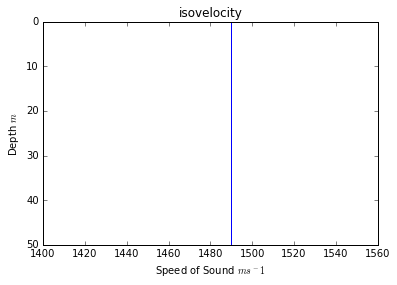

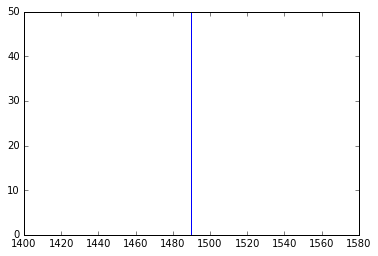

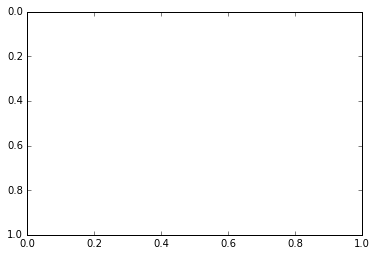

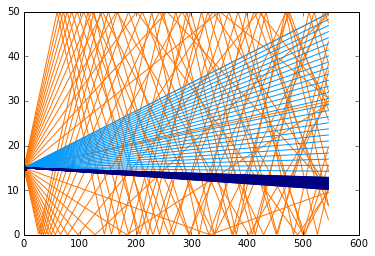

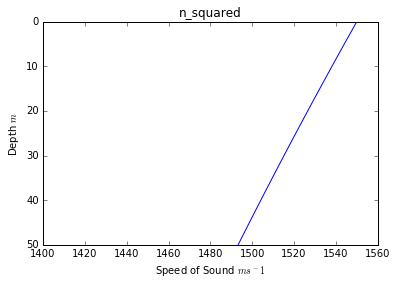

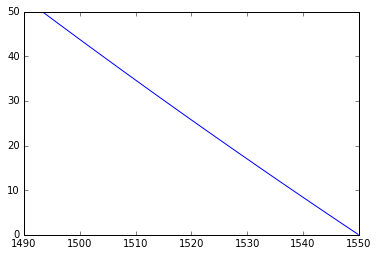

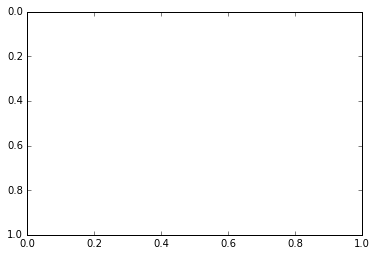

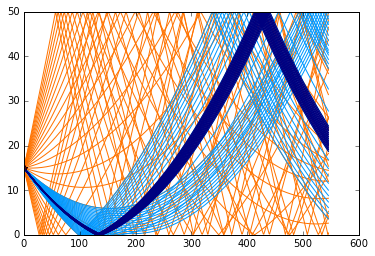

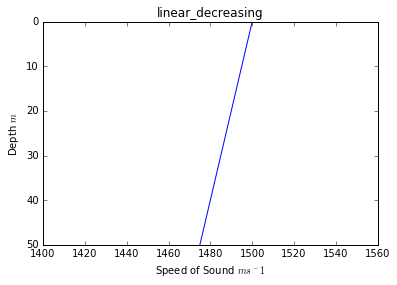

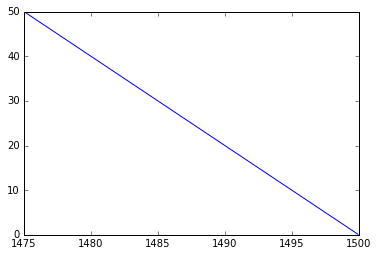

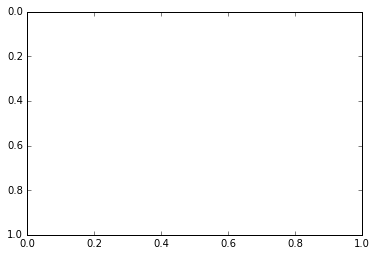

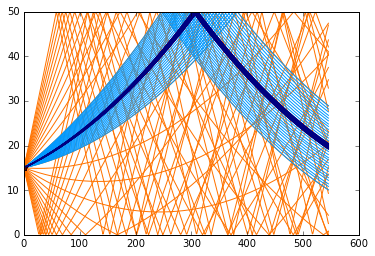

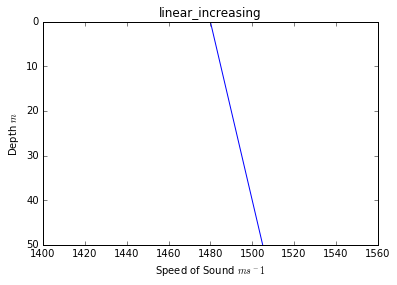

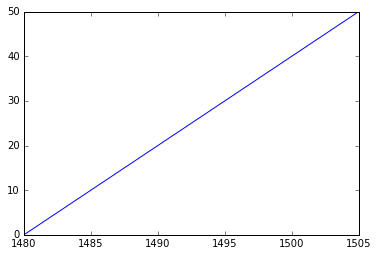

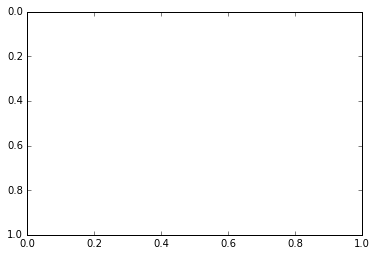

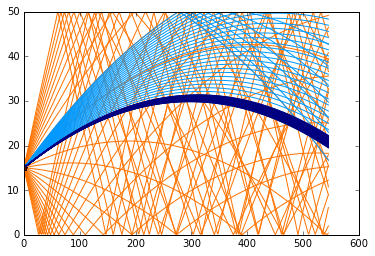

In [40]:
depth = 50
fs = {}
for SSP in SSPS:
    z = np.linspace(0.1, depth, 100)
    ssp_getter = lambda zi: ssp_function(zi, SSP)
    c = map(ssp_getter, z)
    # plot graph of sound speed profile vs depth
    plt.figure()
    plt.title(SSP)
    plt.plot(c, z)
    plt.xlim(1400,1560)
    plt.ylim(depth,0)
    plt.xlabel("Speed of Sound $ms^-1$")
    plt.ylabel("Depth $m$")
    plt.show()
    UUV_time_delay(SSP=SSP, graph=1, depth=depth)
    fs[SSP] = plt.gcf(),plt.gca()
    plt.clf()

In [42]:
f,ax=fs['n_squared']

In [49]:
ax.set_xlabel("Distance")
ax.set_ylabel("Depth")

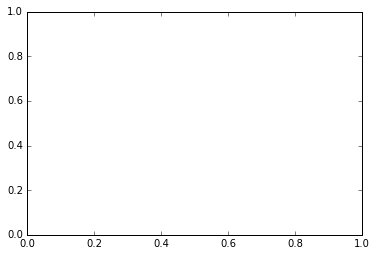

In [55]:
f,ax = plt.subplots()

544.874858751


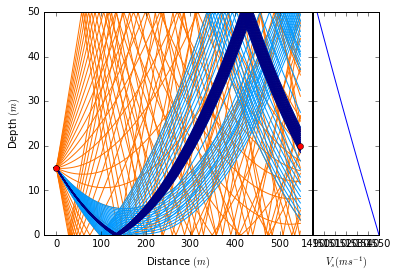

(0.36415568093981326,
 545.64182391015447,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7deba46790>)

In [100]:
UUV_time_delay(SSP="n_squared", graph=1, depth=depth, dist_calc=False)

In [74]:
np.linalg.norm([250,500])

559.01699437494744

In [61]:
x = 0,1,2,3,4

In [62]:
x+=5,6

In [63]:
x

(0, 1, 2, 3, 4, 5, 6)